# The Effect of Loan Variables on Loan Amount
## by Chimamaka Chilaka

## Investigation Overview
>In this analysis, I am interested in determining the variable that affects the loan amount given to borrowers and will be focusing on the Monthly loan payment, Term and IsborrowerHomeowner.

## Dataset Overview

> The data consisted of Loan Original Amount and other features of approximately 114,000 rows of loan data. The dataset was subsetted to get only features for which i was interested in analysing further. The features included StatedMonthlyIncome, DebttoIncome Ratio, Loan Term, Prosper risk score and some other relevant variables. Some data were removed altogether due to inconsistencies noticed.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Loan_data.csv')

In [4]:
# converting to categorical variable
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                                categories=ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

## Loan Original Amount Distribution

>  There is a spike between 0-5k, 10k-15k, 15k-20k(All in dollars). This most likely depicts that the loan is given in multiples of 5k and as a rounded figure. Also, i observed from the plot that majority of the loan seems to have been disbursed at 4k, 10k and 15k causing the distribution to be somewhat tri-modal.

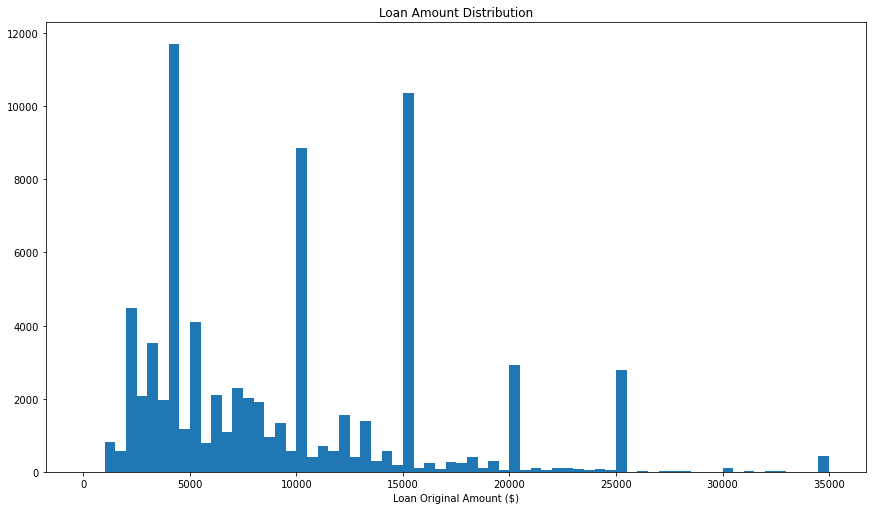

In [5]:
base_color = sb.color_palette()[0]

binsize = 500
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data= df, x= 'LoanOriginalAmount', bins=bins)
plt.xlabel("Loan Original Amount ($)")
plt.title("Loan Amount Distribution")
plt.show()

## Distribution of Monthly Payment

> The variable has a unimodal plot with more of the monthly repayment between 0 to 500 and majority paying approximately 200 or 250.
The plot also shows that there a few people not paying monthly at all.

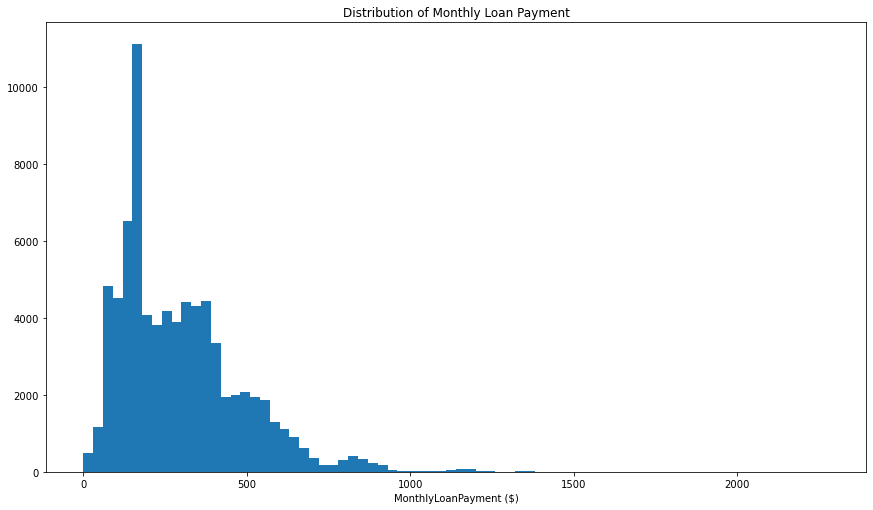

In [6]:
# plotting on a standard scaled plot
binsize = 30
bins = np.arange(0, df['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins);
plt.xlabel('MonthlyLoanPayment ($)');
plt.title('Distribution of Monthly Loan Payment');
plt.show();

## Loan Amount By Monthly Payment

> There is a positive corelation between LoanOriginalAmount and MonthlyLoanPayment which could stem from the fact that the repayment amount is calculated from the Loan amount and more loan will most likely have a higher amount when calculated.

> The plot is split in three parts which could mean that there is a categorical variable affecting this.

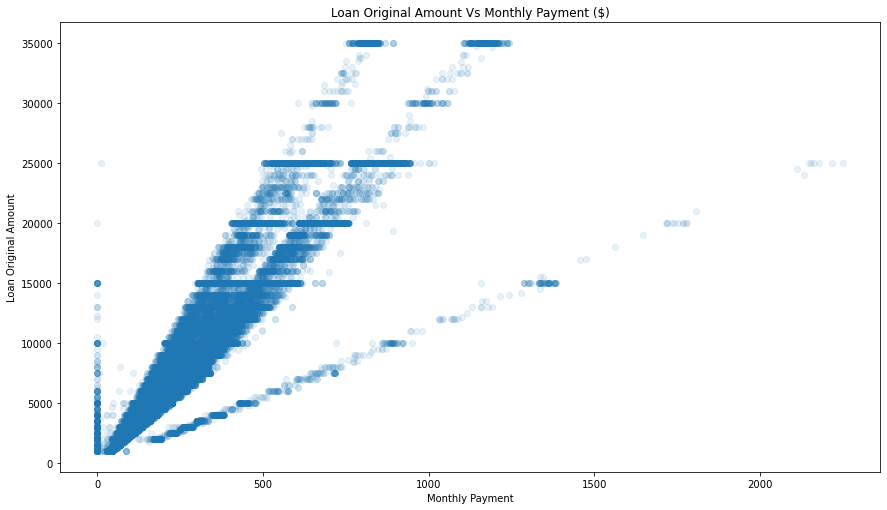

In [7]:
# scatter plot of LoanOriginalAmount vs. MonthlyLoanPayment, with log transform on price axis

plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = df, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('Monthly Payment')
plt.ylabel('Loan Original Amount')
plt.title('Loan Original Amount Vs Monthly Payment ($)')
plt.show()

## Loan Amount Across Term and Monthly Payment

> The Term seems to affect the Loan Original Amount and the Monthly loan payment. Borrowers with a lesser term tend to have hogher monthly payment as compared to those with higher term. This could be because the amount to be paid is spread across a longer period.

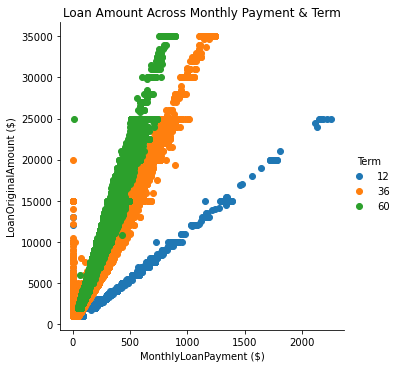

In [9]:
g = sb.FacetGrid(data = df, hue = 'Term', height = 5)

g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount');
plt.title('Loan Amount Across Monthly Payment & Term')
plt.xlabel('MonthlyLoanPayment ($)');
plt.ylabel('LoanOriginalAmount ($)')
g.add_legend();

## Loan Amount Across IsBorrowerHomeowner and EmploymentStatus
> For every time the borrower owns a home amongst the different employment status, the Loan amount given is always more than when the borrower doe not have a home. This could mean that the lender is more comfortable to give borrowers who own homes more loan amount possibly using their home as collateral.

> For the self-employed status however, we see an interesting point. regardless of home owner status, lenders still give more loans to persons that are self employed could mean business men, freelancers etc but still remains just speculations.

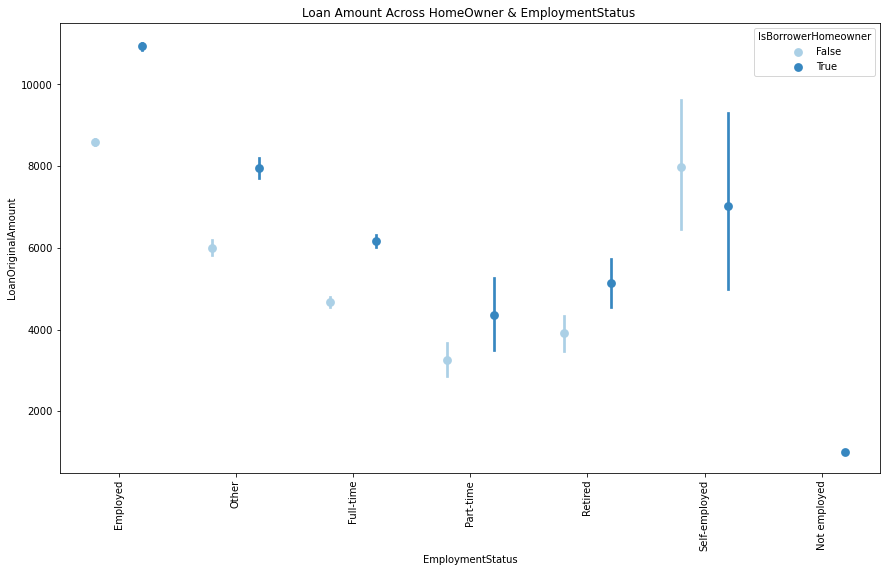

In [10]:
## Plot using seaborn point plot
fig = plt.figure(figsize=[14.70, 8.27])
ax = sb.pointplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amount Across HomeOwner & EmploymentStatus ')
plt.ylabel('LoanOriginalAmount')
plt.xlabel('EmploymentStatus')
plt.xticks(rotation=90)
plt.show();

In [ ]:
!jupyter nbconvert Prosper_Loan_Data_Part_II_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Prosper_Loan_Data_Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 771816 bytes to Prosper_Loan_Data_Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Prosper_Loan_Data_Part_II_slide_deck.slides.html
Use Control-C to stop this server
